In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

# Transformada de Fourier de Gaussiana

In [2]:
#Transformada de fourier
def TF(x):
    N=x.size
    n = np.arange(N)
    k = n.reshape((N,1))
    exponencial = np.exp(-2j*np.pi*k*n/N)
    return np.dot(exponencial,x)

In [3]:
# Gaussina

x = np.linspace(-10, 10, 500, endpoint=True)
sigma=2.
med=0.0
fx=(1/math.sqrt(2*np.pi*sigma**2))*np.exp(-(x-med)**2/(2*sigma**2))

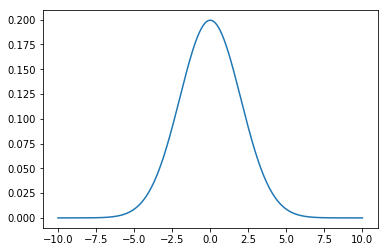

In [4]:
plt.plot(x,fx)

In [6]:
Transformada=TF(fx)

In [10]:
Transformada

array([ 2.49499864e+01+0.00000000e+00j, -2.04964444e+01-1.28784653e-01j,
        1.13632049e+01+1.42801761e-01j, -4.25148879e+00-8.01481682e-02j,
        1.07346810e+00+2.69848778e-02j, -1.82930836e-01-5.74883313e-03j,
        2.10261681e-02+7.93043595e-04j, -1.64054988e-03-7.22017151e-05j,
        7.83504225e-05+3.94164202e-06j, -9.34324123e-06-5.28911740e-07j,
       -5.51912318e-06-3.47233800e-07j, -4.95527568e-06-3.43030448e-07j,
       -4.40143904e-06-3.32490984e-07j, -3.92329058e-06-3.21174495e-07j,
       -3.50971410e-06-3.09529347e-07j, -3.15153741e-06-2.97907996e-07j,
       -2.84060981e-06-2.86535185e-07j, -2.56987962e-06-2.75548230e-07j,
       -2.33333742e-06-2.65025193e-07j, -2.12590673e-06-2.55004428e-07j,
       -1.94331879e-06-2.45498255e-07j, -1.78199069e-06-2.36502223e-07j,
       -1.63891518e-06-2.28001405e-07j, -1.51156494e-06-2.19974636e-07j,
       -1.39781146e-06-2.12397388e-07j, -1.29585727e-06-2.05243628e-07j,
       -1.20417980e-06-1.98487056e-07j, -1.12148506

/home/ale/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


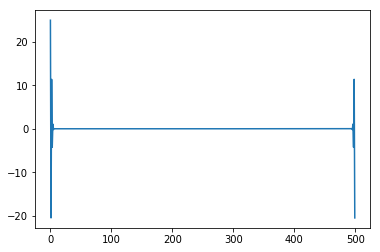

In [7]:
plt.plot(Transformada)

In [8]:
#Transformada de Fourier de Python

Otratransformada=np.fft.fft(fx)

In [11]:
Otratransformada

array([ 2.49499864e+01+0.00000000e+00j, -2.04964444e+01-1.28784653e-01j,
        1.13632049e+01+1.42801761e-01j, -4.25148879e+00-8.01481682e-02j,
        1.07346810e+00+2.69848778e-02j, -1.82930836e-01-5.74883313e-03j,
        2.10261681e-02+7.93043595e-04j, -1.64054988e-03-7.22017151e-05j,
        7.83504225e-05+3.94164202e-06j, -9.34324123e-06-5.28911740e-07j,
       -5.51912318e-06-3.47233799e-07j, -4.95527568e-06-3.43030448e-07j,
       -4.40143904e-06-3.32490983e-07j, -3.92329058e-06-3.21174496e-07j,
       -3.50971410e-06-3.09529345e-07j, -3.15153741e-06-2.97907996e-07j,
       -2.84060981e-06-2.86535183e-07j, -2.56987962e-06-2.75548239e-07j,
       -2.33333743e-06-2.65025191e-07j, -2.12590673e-06-2.55004422e-07j,
       -1.94331878e-06-2.45498255e-07j, -1.78199068e-06-2.36502228e-07j,
       -1.63891518e-06-2.28001408e-07j, -1.51156494e-06-2.19974640e-07j,
       -1.39781146e-06-2.12397390e-07j, -1.29585727e-06-2.05243629e-07j,
       -1.20417980e-06-1.98487057e-07j, -1.12148505

/home/ale/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


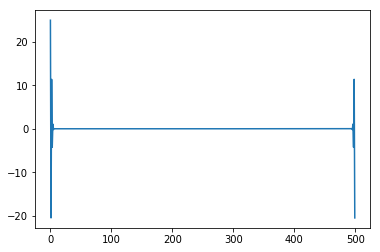

In [9]:
plt.plot(Otratransformada)

# Función de Correlación

In [19]:
#Definimos las funciones para obtener las distancias y los histogramas

def dist2d(x_1,y_1,x_2,y_2):
    d=np.sqrt((x_2 - x_1)**2 + (y_2-y_1)**2)
    return d

def distancias2d(datos,n,Histo,tbin):
    for i in range(0,n):
        for j in range(i+1,n):
            distancia=dist2d(datos[0][i],datos[1][i], datos[0][j],datos[1][j])
            indice=int(distancia/tbin) 
            Histo[indice]=Histo[indice]+1
    return Histo

def distancias2ddr(datos,random,nd,nr,Histo,tbin):
    for i in range(0,nd):
        for j in range(0,nr):
            distancia=dist2d(datos[0][i],datos[1][i], random[0][j],random[1][j])
            indice=int(distancia/tbin) 
            Histo[indice]=Histo[indice]+1
    return Histo
            
def dist_3d(x_1,y_1,z_1,x_2,y_2,z_2):
    d=np.sqrt((x_2 - x_1)**2 + (y_2-y_1)**2+(z_2-z_1)**2)
    return d

def distancias3d(datos,n,Histo,tbin):
    for i in range(0,n):
        for j in range(i+1,n):
            distancia_3d=dist_3d(datos_3d[0][i],datos_3d[1][i], datos_3d[2][i],datos_3d[0][j],datos_3d[1][j], datos_3d[2][j])
            indice=int(distancia_3d/tbin) 
            Histo[indice]=Histo[indice]+1
    return Histo

In [35]:
#Creamos arreglos de datos

#crear la distribución random de pares
L=50
nd=1000

datos=(L*np.random.random(nd),L*np.random.random(nd))

nr=2000

random=(L*np.random.random(nr),L*np.random.random(nr))




nbins=50 #numero de bins
dmax = np.sqrt(2*50**2) #Distancia maxima de las divisiones
dmin = 0.0 #distancia mínima
tbin = (dmax-dmin)/nbins #Tamaño del bin

Histo1=np.zeros(nbins)#Inicio del contador para el histograma
Histo2=np.zeros(nbins)
Histo3=np.zeros(nbins)

nDistDD=nd*(nd-1)/2 #Numero de pares para el arreglo 1

nDistRR=nr*(nr-1)/2 #Numero de pares para el arreglo 2

nDistDR=nd*nr #numero de distancias DR

binss=np.arange(dmin,dmax,tbin) #Arreglo de las divisiones para hacer el histograma

In [31]:
tbin

1.4142135623730951

In [32]:
#Sacamos las distancias entre DD, RR y DR, en 2d

DD=distancias2d(datos,nd,Histo1,tbin)/nDistDD

RR=distancias2d(random,nr,Histo2,tbin)/nDistRR

DR=distancias2ddr(datos,random,nd,nr,Histo3,tbin)/nDistDR

In [33]:
name1='Landy-Szlay'
corr1= (DD+RR-2*DR)/RR

name2='Hewett'
corr2= (DD-DR)/RR

name3='David & Peebles'
corr3= (DD/DR)-1

name4='Hamilton'
corr4= (DD*RR)/(DR)**2 -1

/home/ale/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/home/ale/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/home/ale/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/home/ale/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


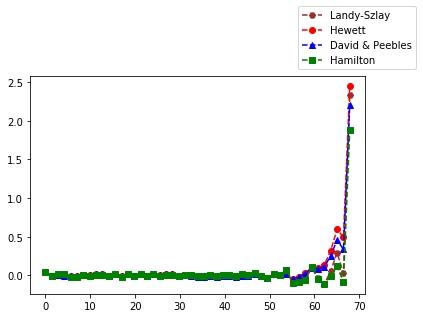

In [39]:
plt.plot(binss,corr1,'--H',label=str(name1),color='brown')
plt.plot(binss,corr2,'--o',label=str(name2),color='red')
plt.plot(binss,corr3,'--g^',label=str(name3),color='blue')
plt.plot(binss,corr4,'--s',label=str(name4),color='green')
plt.legend(bbox_to_anchor=(0.78, 0.90), loc=0, borderaxespad=0.6,prop={'size':10})